In [1]:
from google.colab import drive;
drive.mount('/content/gdrive');

Mounted at /content/gdrive


In [2]:
import pandas as  pd; #Data set eke thin ewa ape data kiyn variable ekt gann
import numpy as nm; #Linear algebra task krnn
import matplotlib.pyplot as plt; #graphic patten chart plot wage ewa adinn ewat
import sklearn as sk; #performance metrics adinna

import seaborn as sns;
import sklearn.metrics as sm;
import sklearn.datasets
#from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
#data = pd.read_csv("/content/gdrive/MyDrive/Dataset/savinduResturantDataSet.csv", sep='|', encoding='latin-1', error_bad_lines=False);
data_set = pd.read_csv("/content/gdrive/MyDrive/Dataset/savindu_resturant_dataset.csv");
test_data_set = data_set; 

In [67]:
#Data set eke print kr ganna
#print(data_set); 

#data set eke mul row 5 he data ganna
print(test_data_set.head(2));

#data set eke data wl thin min max meadium wage vistarayak gann
#print(data_set.describe());

#get summerrize infromation data set eke : missing values thin colum hoy gnn puluwn data set eke lenght ek blll e colum eket adalawa
#meken puluwn apit 
# Quatitative data : ek dight gnn krnn puluwn ew / uniq wage thin ew / ekm ek ayayak vitrk ek cell ekk thin ew 
# countinous Data : ekm de dethun par wel thin ew
# Categorical data : e kiynne gender, wage yamkisi group ekk thin data hadaunagen
#apit  variable vidiyt gnn one train krnn ekm de wechcha ew hind Quatitative ain krl, 
#countinousl & categorical data colum nm hadauna gann model ek train krnn
#Target variable ek vidiyt :  Rating colum ek gannawa anthim out put ek ratin ek gnn hind prediction ekedi uttre hoyn ek
#print(data_set.info());

#data sele eke thin nawat nawatha e colum eke yedil thin data wen wenm praman blnn puluwn
#print(data_set.nunique());

#print(sum(data_set.isnull().sum()));

# checking the ROWS , COLS 
#(2000, 9)
#print(data_set.shape);

#colum name tik balann
#for col in data_set : print("columm : " + col);

#Data set ek thin colume wal null thin ew gan balann
#print(data_set.isnull().sum());

#null values thinw nm ew replace krnn mean eken dataset eke
#print(data_set.fillna(data_set.mean(),inplace=True));



   RestaurantID    RestaurantName  CountryCode         City  \
0       6317637  Le Petit Souffle          162  Makati City   
1       6304287  Izakaya Kikufuji          162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                     LocalityVerbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines          Currency Has_Table_booking  \
0  French, Japanese, Desserts  Botswana Pula(P)               Yes   
1                    Japanese  Botswana Pula(P)               Yes   

  Has_Online_delivery Is_delivering_now Switch_

In [5]:
#habi samahar welawat Quatitative colum ekk thinn puluwn ekm de thin tawa colum wen krl gnn puluwn. e wage w model ek train krnn gnn puluwn
# ex : cusin colum : 1 cell = french,english 2 cell= english,japan,denmark oy wage
#ekt function ekk hadmu ekem comul thinw nm e colum name pass krl eke separate krnn puluwn count gan hoynn
def coulum_separated_counter(input_string_as_colum_name) : 
  new_colums=len(str(input_string_as_colum_name).split(',')); 
  return (new_colums);

In [6]:
#          Feature selection
'''
machin learning model ek hadann api lg dil thin data set eken awashya colum,data, wen krl gann ekt
  benifits : Overfit wen ek wlakinwa, Accuracy ek wadi wenwa , Model ek train time ek adu wenwa anawashya data nathi hind

  supervice leaning : predict krn out put data label ek use krn ek  -> filter/wrapper/intrinsic method use krnw slect krnn features
  unsupervice learning : out put eke labele ek use nokrn ek

  methods Filter : ok use krnne preprocessing wlt/ corerelation ek arn rank krl blnw out put value ek ek ekk
                  /okedi corerelation ek wadim agaya thin ecolum ek ain krnw/ e vidiyt ithiri features aselect kr gnnw
                  Quntitative/unique data thin  data tin colum kelinm ain krl dana,1,2,3,4 wag ewa

  corerelation hoynn ek ek awastawala use krn ewa 
  
         Fature/comum variable ek/atribute type ek                       out put eke vaue ek                   use krn corelation text ek
         
         continouous data                                                continous data ekk nm                    pearson'correlation
         continouous data                                                 categorical nm                          LDA
         Categorical data                                                 Continous data                          Anova
         Categorical data                                                 categorical data                        chi-squre
'''

"\nmachin learning model ek hadann api lg dil thin data set eken awashya colum,data, wen krl gann ekt\n  benifits : Overfit wen ek wlakinwa, Accuracy ek wadi wenwa , Model ek train time ek adu wenwa anawashya data nathi hind\n\n  supervice leaning : predict krn out put data label ek use krn ek  -> filter/wrapper/intrinsic method use krnw slect krnn features\n  unsupervice learning : out put eke labele ek use nokrn ek\n\n  methods Filter : ok use krnne preprocessing wlt/ corerelation ek arn rank krl blnw out put value ek ek ekk\n                  /okedi corerelation ek wadim agaya thin ecolum ek ain krnw/ e vidiyt ithiri features aselect kr gnnw\n                  Quntitative/unique data thin  data tin colum kelinm ain krl dana,1,2,3,4 wag ewa\n\n  corerelation hoynn ek ek awastawala use krn ewa \n  \n         Fature/comum variable ek/atribute type ek                       out put eke vaue ek                   use krn corelation text ek\n         \n         continouous data             

In [7]:
# OUT Liyers 
'''
  ape data sek bln yaddi e colum eke thinn puluwn nogalpen values ex : 33,38,32, 9 , 35,33,36 oke 9 kiyn ek out liyers ekk
  ex : bank ekkin ek para horen kotigank ganiddi ek sak sahithi wage deyk

  out liyers ain klm accuracy ek wadi wenw model eke

  *supervice learning wldi -> classifcation/regression kraddi -> out liyers ain krnn on nattn niwardi parasayak gann bh agay

  out liyer ain krnna    : 1 : box plot wal depatte kone thin ewa  / scatterplot wal athin thin ew

                          2 : antaschatrurthak parasayaen obbata thin ew out liyer vidiyt gnn puluwn  data ek < ( Q3-Q1 ) < data ek
                          pyhton code -> withpOutOutLiyers_dataSet = data_set[~ (data_set < (Q1 - 1.5 * IQR)) | (data_set > (Q3 + 1.5 * IQR)).any(axis=1)] ;
                                         print(withpOutOutLiyers_dataSet.shape);

                          3 : Z-Score ek magin out liyer ek hoyn ek 
                          python code -> from scipy import stats;
                                         import numpy as np;
                                         zValue = np.abs(stats.zscore(data_set)); 
                                         
                                         * normal distribution prastare cure eke depatta kone thin data outliyers vidiyt gnnw 
                                         
                                         withOutOutLiyers_data_set = data_set [(zValue < 3).all(axis=1)];

                           4 : K-Mean use krl cluster(pokurak)godkt athin thin ewa outliyer vidiyt gnn puluwn               

'''

'\n  ape data sek bln yaddi e colum eke thinn puluwn nogalpen values ex : 33,38,32, 9 , 35,33,36 oke 9 kiyn ek out liyers ekk\n  ex : bank ekkin ek para horen kotigank ganiddi ek sak sahithi wage deyk\n\n  out liyers ain klm accuracy ek wadi wenw model eke\n\n  *supervice learning wldi -> classifcation/regression kraddi -> out liyers ain krnn on nattn niwardi parasayak gann bh agay\n\n  out liyer ain krnna    : 1 : box plot wal depatte kone thin ewa  / scatterplot wal athin thin ew\n\n                          2 : antaschatrurthak parasayaen obbata thin ew out liyer vidiyt gnn puluwn  data ek < ( Q3-Q1 ) < data ek\n                          pyhton code -> withpOutOutLiyers_dataSet = data_set[~ (data_set < (Q1 - 1.5 * IQR)) | (data_set > (Q3 + 1.5 * IQR)).any(axis=1)] ;\n                                         print(withpOutOutLiyers_dataSet.shape);\n\n                          3 : Z-Score ek magin out liyer ek hoyn ek \n                          python code -> from scipy import stats;

In [63]:
#aluthen colum ekk add kl cusine kiyn eke wachn gan separate kl count ek bll
data_set['CuisineCount'] = data_set['Cuisines'].apply(coulum_separated_counter);
#print(data_set.head());
print(data_set.isnull().sum());

RestaurantID            0
RestaurantName          0
CountryCode             0
City                    0
Address                 0
Locality                0
LocalityVerbose         0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
CuisineCount            0
dtype: int64


In [9]:
#data set eke thin ML model ek hadann wadak nathi Quatitative colum tik ain krnw 
unwanted_culumns = ['RestaurantID','RestaurantName','City','Address','Locality','LocalityVerbose','Cuisines'];
new_data_set = data_set.drop(unwanted_culumns,axis=1);
#print(new_data_set.head());

In [10]:
#Data set eke thin colum wl missing values /null ew thinwd blnn
#null values nattn : ek clean data set ekk ek gnn puluwn Model ek train krnn
#null values thibbot ek Mean value eken replace krnn
print(new_data_set.isnull().sum());

CountryCode             0
Longitude               0
Latitude                0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
CuisineCount            0
dtype: int64


In [11]:
print(new_data_set.fillna(data_set.mean(),inplace=True));

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
print(new_data_set.head(3));

   CountryCode   Longitude   Latitude          Currency Has_Table_booking  \
0          162  121.027535  14.565443  Botswana Pula(P)               Yes   
1          162  121.014101  14.553708  Botswana Pula(P)               Yes   
2          162  121.056831  14.581404  Botswana Pula(P)               Yes   

  Has_Online_delivery Is_delivering_now Switch_to_order_menu  Price_range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   

   Votes  Average_Cost_for_two  Rating  CuisineCount  
0    314                  1100     4.8             3  
1    591                  1200     4.5             1  
2    270                  4000     4.4             4  


In [13]:
#Dan thinne moedl ek ek ek Nachin Learning Technique walin Train krl wadim aquaracy ek thin technique ek thora ganna
#ex : Decision tree, Randam forest , K-Mean, ANN-Artificial nural network 
#     support vector danne image processing  wage de walt


In [14]:
#print(new_data_set.head(3));
#for col in data_set : print("columm : " + col);

In [15]:
#Model ekt colum thoragann
selected_columns_for_ml = ['Votes','Average_Cost_for_two','Has_Table_booking','Has_Online_delivery','Price_range'];
DataForModel = new_data_set[selected_columns_for_ml];
print
#print(DataForModel.head(3));
for col in DataForModel : print("columm : " + col);

columm : Votes
columm : Average_Cost_for_two
columm : Has_Table_booking
columm : Has_Online_delivery
columm : Price_range


In [16]:
#final data tik save krgann reference ekk vidiyt during deployment time ek wenkn
DataForModel.to_pickle('DataForModel.pkl');

In [17]:
#Data set eke thin yes/no colum thinw nm ew numeric 1/2 wage denw model ek train krnn
DataForModel['Has_Table_booking'].replace({'Yes' : 1, 'No' : 0}, inplace = True);
DataForModel['Has_Online_delivery'].replace({'Yes' : 1, 'No' : 0},inplace = True);
print(DataForModel.head(3));

   Votes  Average_Cost_for_two  Has_Table_booking  Has_Online_delivery  \
0    314                  1100                  1                    0   
1    591                  1200                  1                    0   
2    270                  4000                  1                    0   

   Price_range  
0            3  
1            3  
2            4  


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#                         check out liyers

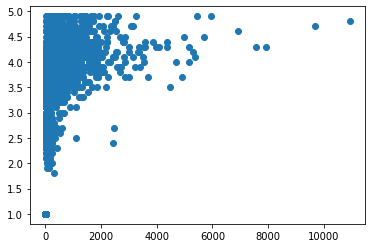

In [18]:
xCol = DataForModel['Votes'];
yCol = new_data_set['Rating']
plt.scatter(xCol,yCol);
plt.show();

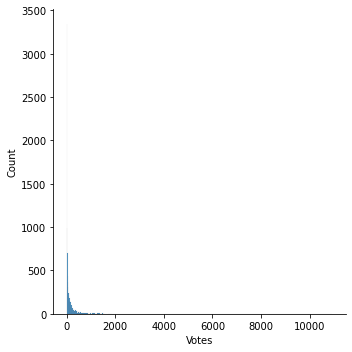

In [53]:
sns.displot(DataForModel['Votes'].dropna());

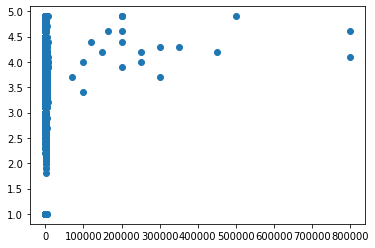

In [19]:
xCol = DataForModel['Average_Cost_for_two'];
yCol = new_data_set['Rating']
plt.scatter(xCol,yCol);
plt.show();

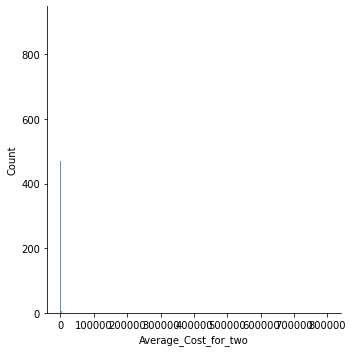

In [54]:
sns.displot(DataForModel['Average_Cost_for_two'].dropna());

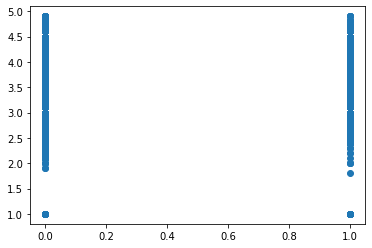

In [20]:
xCol = DataForModel['Has_Table_booking'];
yCol = new_data_set['Rating']
plt.scatter(xCol,yCol);
plt.show();

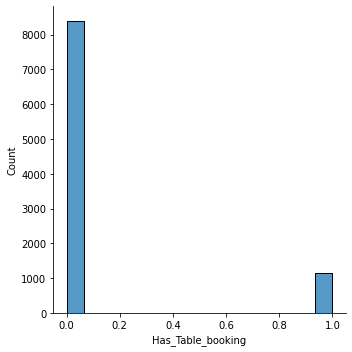

In [55]:
sns.displot(DataForModel['Has_Table_booking'].dropna());

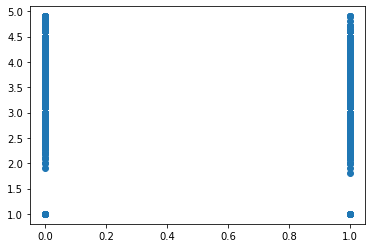

In [21]:
xCol = DataForModel['Has_Online_delivery'];
yCol = new_data_set['Rating']
plt.scatter(xCol,yCol);
plt.show();

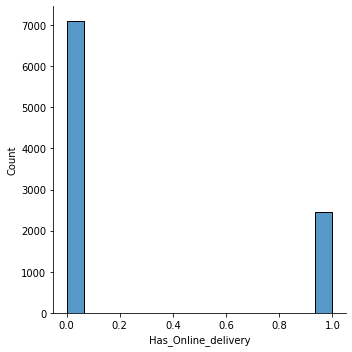

In [56]:
sns.displot(DataForModel['Has_Online_delivery'].dropna());

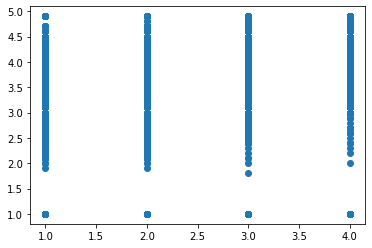

In [22]:
xCol = DataForModel['Price_range'];
yCol = new_data_set['Rating']
plt.scatter(xCol,yCol);
plt.show();

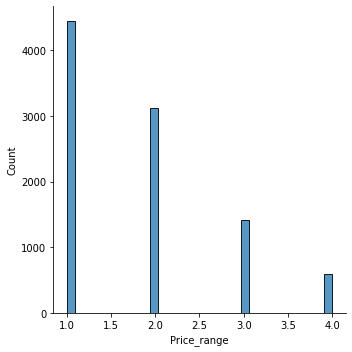

In [57]:
sns.displot(DataForModel['Price_range'].dropna());

In [23]:
#convert krnw nominal variable to numeric wlt 
DataForModelNumeric = pd.get_dummies(DataForModel);
DataForModelNumeric['Rating'] = new_data_set['Rating'];
print(DataForModelNumeric.head(2));

   Votes  Average_Cost_for_two  Has_Table_booking  Has_Online_delivery  \
0    314                  1100                  1                    0   
1    591                  1200                  1                    0   

   Price_range  Rating  
0            3     4.8  
1            3     4.5  


In [24]:
print("DataForModelNumeric.shape : ",DataForModelNumeric.shape);

DataForModelNumeric.shape :  (9551, 6)


In [25]:
print("DataForModelNumeric.info : ",DataForModelNumeric.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Votes                 9551 non-null   int64  
 1   Average_Cost_for_two  9551 non-null   int64  
 2   Has_Table_booking     9551 non-null   int64  
 3   Has_Online_delivery   9551 non-null   int64  
 4   Price_range           9551 non-null   int64  
 5   Rating                9551 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 447.8 KB
DataForModelNumeric.info :  None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


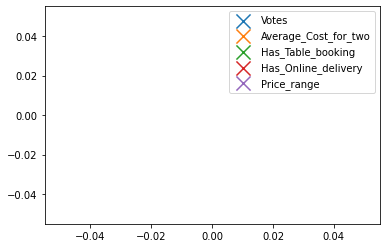

In [26]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#Load Data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(DataForModelNumeric)
#Import KMeans module
from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
#predict the labels of clusters.
label = kmeans.fit_predict(df) 
#Getting unique labels
u_labels = nm.unique(label)
u_labels = ['Votes','Average_Cost_for_two','Has_Table_booking','Has_Online_delivery','Price_range'];
#plotting the results:
for i in u_labels:
     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i,marker='x',s=200)
plt.legend()
plt.show()

In [27]:
from scipy import stats;
import numpy as np;
zValue = np.abs(stats.zscore(DataForModelNumeric)); 
print(zValue)
withOutOutLiyers_data_set = DataForModelNumeric[(zValue < 5).all(axis=1)];
print(withOutOutLiyers_data_set.head(3))

[[3.65201639e-01 6.15438439e-03 2.69218148e+00 5.87546822e-01
  1.31980312e+00 1.69096076e+00]
 [1.00916810e+00 4.89590650e-05 2.69218148e+00 5.87546822e-01
  1.31980312e+00 1.42518840e+00]
 [2.62910937e-01 1.73742576e-01 2.69218148e+00 5.87546822e-01
  2.42409043e+00 1.33659761e+00]
 ...
 [1.17190331e+00 6.38454785e-02 3.71445985e-01 5.87546822e-01
  2.42409043e+00 7.16462104e-01]
 [1.72985259e+00 6.69471502e-02 3.71445985e-01 5.87546822e-01
  2.42409043e+00 9.82234465e-01]
 [1.00916810e+00 7.09793235e-02 3.71445985e-01 5.87546822e-01
  2.15515814e-01 9.82234465e-01]]
   Votes  Average_Cost_for_two  Has_Table_booking  Has_Online_delivery  \
0    314                  1100                  1                    0   
1    591                  1200                  1                    0   
2    270                  4000                  1                    0   

   Price_range  Rating  
0            3     4.8  
1            3     4.5  
2            4     4.4  


In [28]:
#Reggression part ek start krnw

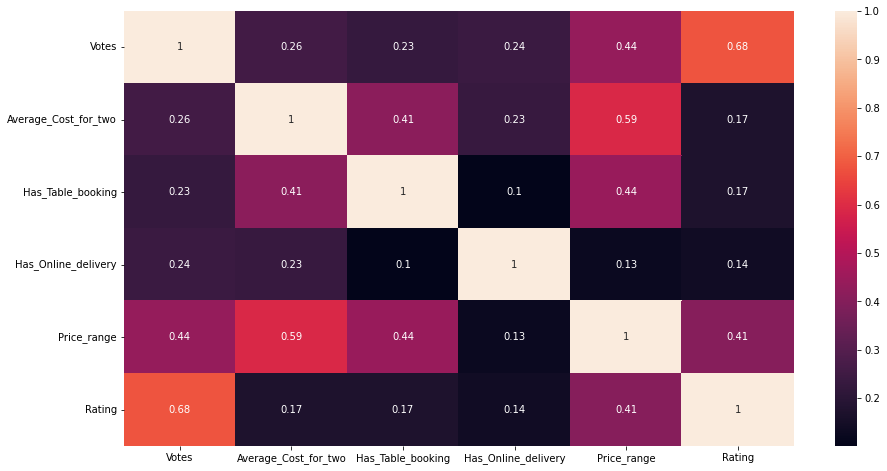

In [29]:
#Corerelation ek balala eke thin Variable atara stong the nadd balann
corr = DataForModelNumeric.corr(method='kendall');
#kotuwk size ek hadann 15,8
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True);

In [100]:
#okedi pena wadim corelationship ek votes,rating eki atr 0.68i kiyl e hind e dek atar eccr hithann one nh

In [101]:
#model - sklearn eke thinw model selection library ekk
#Traning set ek :  model ek train krnni,eke optimization krnni 
    #  x train , y train
#Testing set ek :  model eke performance blanni
    #  x test , y test

In [102]:
#      cross validation
#  data set eke test/train : 25%/75% , test/train : 75%/25% vidiyt vivid parima walin arn ek ek machin 
#  learning algorithm ekkt dala ckeck krl blnw adum error thin  algorithm ek thor gannawa model ek hadann
# algorithm vidiyt use krnw 1 : support vector macin, deep learning, random forest, kmean .....owain ekk thm anithit thor ganne
# cross validation yoda gnn puluwn hyper parameeter tun krnn hod agyk hit gnnt

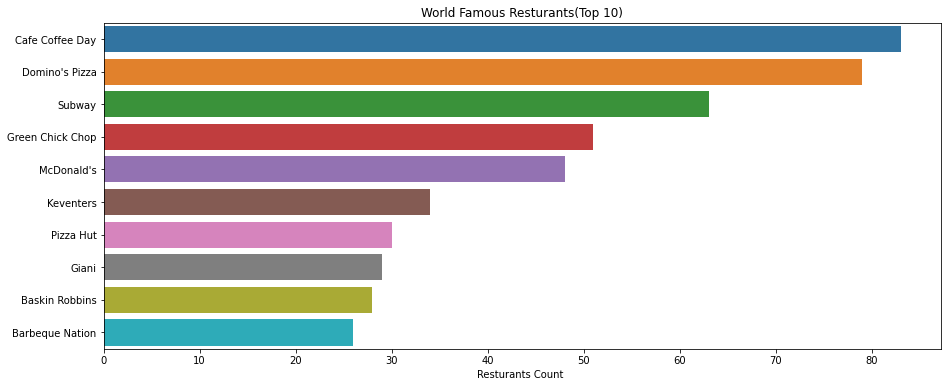

In [71]:
plt.figure(figsize=(15,6));
dataf = data_set['RestaurantName'].value_counts()[:10];
sns.barplot(y=dataf.index,x=dataf.values);
plt.title('World Famous Resturants(Top 10)');
plt.xlabel('Resturants Count ');
plt.show();

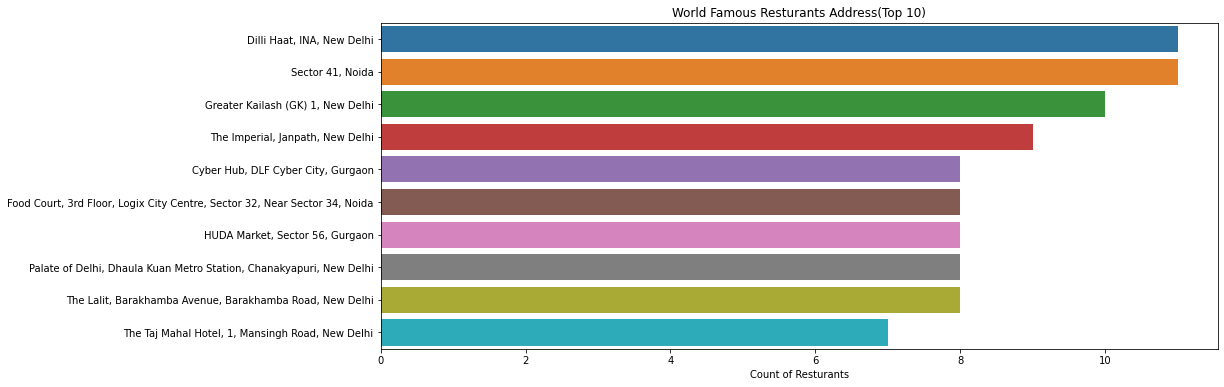

In [72]:
plt.figure(figsize=(15,6));
dataf = data_set['Address'].value_counts()[:10];
sns.barplot(y=dataf.index,x=dataf.values);
plt.title('World Famous Resturants Address(Top 10)');
plt.xlabel('Count of Resturants');
plt.show();

In [79]:
onlineOrderSupportCount = DataForModel['Has_Online_delivery'].value_counts();
tableBookingSupportCount = DataForModel['Has_Table_booking'].value_counts();
costForTwoSupportCount = DataForModel['Average_Cost_for_two'].value_counts();
print('');
print('onlineOrderSupportCount : ','\n',onlineOrderSupportCount);
print('');
print('tableBookingSupportCount : ','\n',tableBookingSupportCount)
print('');
print('costForTwoSupportCount : ','\n',costForTwoSupportCount);


onlineOrderSupportCount :  
 0    7100
1    2451
Name: Has_Online_delivery, dtype: int64

tableBookingSupportCount :  
 0    8393
1    1158
Name: Has_Table_booking, dtype: int64

costForTwoSupportCount :  
 500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average_Cost_for_two, Length: 140, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


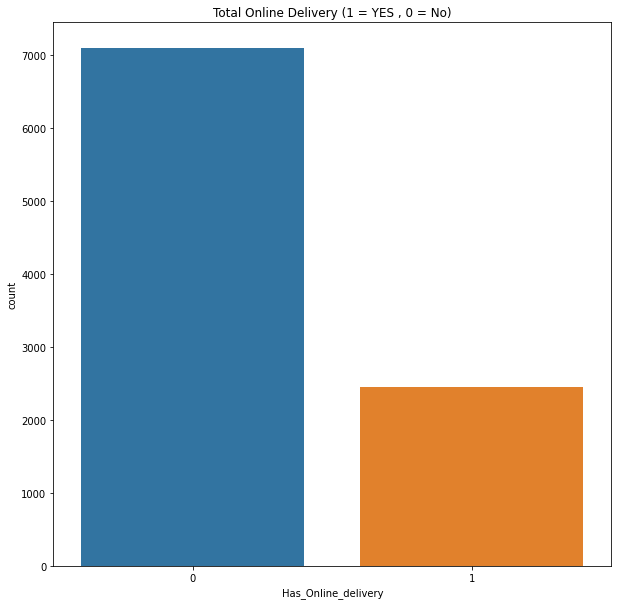

In [84]:
plt.figure(figsize=(10,10));
sns.countplot(DataForModel['Has_Online_delivery']);
plt.title('Total Online Delivery (1 = YES , 0 = No)');
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


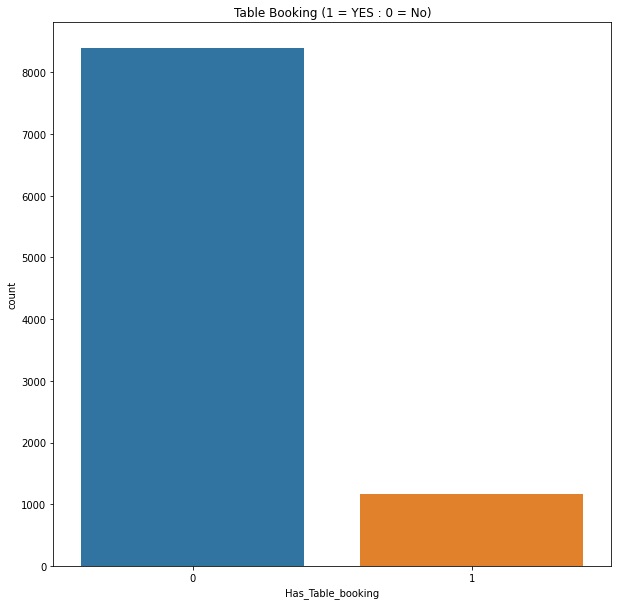

In [75]:
plt.figure(figsize=(10,10));
sns.countplot(DataForModel['Has_Table_booking']);
plt.title('Table Booking (1 = YES , 0 = No)');
plt.show();

In [ ]:
#             Data Transformation : datta pariwarthanaya
'''
 use krn Algorithm -> KNN - K nearest neibors , K-Mean , PCA-Principale Compoenent Analysis , Gradient Desent 
 use karanne na      -> Tree base algorithm wldi : Decision Tree/Random forest(decision tree godak)

     ek colum ekk values wl agay aneth colum wlt sapenshawa hugak adu/wadi unot e colum ek ekt machin learning model ek 
     naburu wenn puluwn. ekt kiynne BIAS wenw kiyl. ok mag arinn thm data trasformation krnne

     krama : 1 : min max scaler : e colum eke data serm 0-1 parasayata ganna 
                 ex -> value =(x-x_min)/(x_max-x_min)

                 python code :
                 from sklearn.preprocessing import MinMaxScaler
                 scaler=MinMaxScaler(); // 0-1 th parasaye
                 #scaler=MinMaxScaler(feature_range=(0,10)); // 0-10 th prayayat
                 new_data_set['colum name'] = scaler.fit_transform(data_set.values);
                 print(new_data_set);

             2 : standerd scaler    : mean agaya math padanawa
                 python code :
                 from sklearn.preprocessing import SatnderdScaler
                 scaler=SatnderdScaler(); 
                 new_data_set['colum name'] = scaler.fit_transform(data_set.values);
                 print(new_data_set);

             3 : Maxabs scaler    : maximum agaya matha padanamwa ok
                 python code :
                 from sklearn.preprocessing import MaxAbsScaler
                 scaler=MaxAbsScaler(); 
                 new_data_set['colum name'] = scaler.fit_transform(data_set.values);
                 print(new_data_set); 

             4 : Robust scaler    : anthas chathurthaya prasaya math padnamwa
                 x_scale = (x-Q1)/(Q3-Q1) ;
                 python code :
                 from sklearn.preprocessing import RobustScaler
                 scaler=RobustScaler(); 
                 new_data_set['colum name'] = scaler.fit_transform(data_set.values);
                 print(new_data_set);

             5 : Log transform :     ektara antharakata nburu u data : vishala parasayak thin ew data 2k atara colum eke    income :{70000,2000}  
                 transformed_data_set['colum'] = np.log(data_set['colum']);
''' 

In [30]:
#Separate krnawa Target/Predictors variable tik
TargetVariable = 'Rating';
Predictors = ['Votes','Average_Cost_for_two','Has_Table_booking','Has_Online_delivery','Price_range'];
#Predictors = ['Votes'];

x= DataForModelNumeric[Predictors].values;
#x = DataForModel.reshape(1000,1);
#xx=x.values; 
y= DataForModelNumeric[TargetVariable].values; 
#y= DataForModelNumeric.reshape(1000,1);
#yy=y.values;

In [31]:
from sklearn.preprocessing import MinMaxScaler;
#scaler=MinMaxScaler();
scaler=MinMaxScaler(feature_range=(0,10));
transformed_data_set = scaler.fit_transform(x);
print(transformed_data_set);

[[2.87177611e-01 1.37500000e-02 1.00000000e+01 0.00000000e+00
  6.66666667e+00]
 [5.40515822e-01 1.50000000e-02 1.00000000e+01 0.00000000e+00
  6.66666667e+00]
 [2.46936162e-01 5.00000000e-02 1.00000000e+01 0.00000000e+00
  1.00000000e+01]
 ...
 [6.04536309e-01 2.12500000e-03 0.00000000e+00 0.00000000e+00
  1.00000000e+01]
 [8.24035120e-01 1.50000000e-03 0.00000000e+00 0.00000000e+00
  1.00000000e+01]
 [5.40515822e-01 6.87500000e-04 0.00000000e+00 0.00000000e+00
  3.33333333e+00]]


In [ ]:
#                        Machin Learning Model



In [32]:
#Data model ek train / Test kiyl kali dekkkt wen krnn
from sklearn.model_selection import train_test_split;

In [33]:
x_train, y_train , x_test , y_test = train_test_split(x,y,test_size = 0.2,random_state = 421);

print("X-Training data set shape : ",x_train.shape);
print("X-Test data set shape     : ",x_test.shape);
print("Y Train data set shape    : ",y_train.shape);
print("Y Test data set shape     : ",y_test.shape);

X-Training data set shape :  (7640, 5)
X-Test data set shape     :  (7640,)
Y Train data set shape    :  (1911, 5)
Y Test data set shape     :  (1911,)


In [34]:

x_train_mode=x_train.reshape(7640,5);
y_train_mode=y_train.reshape(1911,5);

x_test_mode=x_test.reshape(7640,1);
y_test_mode=y_test.reshape(1911,);
'''
x_train_mode=x_train.reshape(1,-1);
y_train_mode=y_train.reshape(-1,1);
x_test_mode=x_test.reshape(1,-1);
y_test_mode=y_test.reshape(1,-1);
'''


'\nx_train_mode=x_train.reshape(1,-1);\ny_train_mode=y_train.reshape(-1,1);\nx_test_mode=x_test.reshape(1,-1);\ny_test_mode=y_test.reshape(1,-1);\n'

In [ ]:
#                         0 : Accuracy check in Support Vector Model                             

In [ ]:
'''
from sklearn import svm;
suportVectorModel = svm.SVC();
suportVectorModel.fit(x_train_mode,y_train_mode.ravel(),sample_weight=500);//err ek awa
supportVectorModelAccuracy = suportVectorModel.score(x_test_mode,y_test_mode);
print('supportVectorModelAccuracy : ',supportVectorModelAccuracy);
'''

In [ ]:
#                      1 : Accuracy Lineer Regrresion model


In [133]:
from locale import normalize
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=10);
Lmodel = LinearRegression();
Lmodel.fit(x_train,y_train);
print('');
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False);

print("Lmodel.intercept_ : ",Lmodel.intercept_);
print("Lmodel.coef (correlation efficient) : ",Lmodel.coef_);

from sklearn.metrics import r2_score;
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report;
y_predict = Lmodel.predict(x_test);
R2_Score = r2_score(y_test,y_predict);
R2Lmodel_Score = R2_Score;

print(" Lineer Regrresion model R2 SCORE : ",R2_Score);

'''
Model Evaluation
There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), 
or Root mean squared error (RMSE).
MAE: The easiest to understand. Represents average error
MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”.
 It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.
'''
from sklearn import metrics
Mean_Absolute_Error= metrics.mean_absolute_error(y_test, y_predict);
Mean_Squared_Error=metrics.mean_squared_error(y_test, y_predict);
Root_Mean_Squared_Error= np.sqrt(metrics.mean_squared_error(y_test, y_predict));

print("");
print('Mean Absolute Error : ', Mean_Absolute_Error);
print('Mean Squared Error : ', Mean_Squared_Error);
print('Root Mean Squared Error : ', Root_Mean_Squared_Error);




Lmodel.intercept_ :  1.7897163986508051
Lmodel.coef (correlation efficient) :  [ 5.63716167e-04  1.20025250e-06 -2.25427344e-01  4.37579160e-01
  5.13763243e-01]
 Lineer Regrresion model R2 SCORE :  0.29072125706980445

Mean Absolute Error :  0.7866759462710213
Mean Squared Error :  0.8923769438705131
Root Mean Squared Error :  0.9446570509293376


In [ ]:
#                    2 : Accuracy  RandomForest Reggression model


In [134]:
from sklearn.ensemble import RandomForestRegressor;
from sklearn.model_selection import train_test_split;
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10);
Rmodel=RandomForestRegressor(n_estimators=650,random_state=230,min_samples_leaf=0.0001);
Rmodel.fit(x_train,y_train);
y_predict=Rmodel.predict(x_test);
R2_Score = r2_score(y_test,y_predict);
R2RFmodel_Score = R2_Score;

print(" RandomForest Reggression model R2 SCORE : ",R2_Score);

#model ek evaluate krnn
from sklearn import metrics
Mean_Absolute_Error= metrics.mean_absolute_error(y_test, y_predict);
Mean_Squared_Error=metrics.mean_squared_error(y_test, y_predict);
Root_Mean_Squared_Error= np.sqrt(metrics.mean_squared_error(y_test, y_predict));

print("");
print('Mean Absolute Error : ', Mean_Absolute_Error);
print('Mean Squared Error : ', Mean_Squared_Error);
print('Root Mean Squared Error : ', Root_Mean_Squared_Error);


'''
#Random forest classifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score;
from sklearn.ensemble import RandomForestClassifier;
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10);
RFmodel = RandomForestClassifier(n_estimators=650,random_state=230,min_samples_leaf=0.0001);
RFmodel.fit(x_train,y_train);
y_predict=RFmodel.predict(x_test);
R2_Score = r2_score(y_test,y_predict);
print(" RandomForest Classifeier model R2 SCORE : ",R2_Score);

#Accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score;
#print("Accuracy :  ",accuracy_score(y_test,y_predict));
print("classification_report : ",classification_report(y_test,y_predict));
print("confusion_matrix : ",confusion_matrix(y_test,y_predict));
'''





 RandomForest Reggression model R2 SCORE :  0.8934603098714542

Mean Absolute Error :  0.23553054640014653
Mean Squared Error :  0.13363686314730205
Root Mean Squared Error :  0.3655637607139171


'\n#Random forest classifier\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score;\nfrom sklearn.ensemble import RandomForestClassifier;\nx_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10);\nRFmodel = RandomForestClassifier(n_estimators=650,random_state=230,min_samples_leaf=0.0001);\nRFmodel.fit(x_train,y_train);\ny_predict=RFmodel.predict(x_test);\nR2_Score = r2_score(y_test,y_predict);\nprint(" RandomForest Classifeier model R2 SCORE : ",R2_Score);\n\n#Accuracy\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score;\n#print("Accuracy :  ",accuracy_score(y_test,y_predict));\nprint("classification_report : ",classification_report(y_test,y_predict));\nprint("confusion_matrix : ",confusion_matrix(y_test,y_predict));\n'

In [ ]:
#                            3 : Accuracy ExtraTree Regression 

In [150]:
import sklearn;
from sklearn.ensemble import ExtraTreesRegressor;
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10);
print("X-Training data set shape : ",x_train.shape);
print("X-Test data set shape     : ",x_test.shape);
print("Y Train data set shape    : ",y_train.shape);
print("Y Test data set shape     : ",y_test.shape);
#Prepar krnw Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120);
ET_Model.fit(x_train,y_train);
y_predict= ET_Model.predict(x_test);

#  Save krnw model ek disk ekt actual values dala test krnn puluwn wenn 
#  model ek actual data dala prectict krl result kr
import pickle;
pickle.dump(ET_Model, open('model.pkl','wb'));
model=pickle.load(open('model.pkl','rb'));

print(' ');
print("y_predict(Rating) -> : ",y_predict);

#  R2 Score ek hoyanna
from sklearn.metrics import r2_score;
R2_Score = r2_score(y_test,y_predict);
R2ETmodel_Score = R2_Score;

print(" ");
print('ExtraTree Regression  model R2 Score : ',R2_Score);

'''
Model Evaluate krnn
'''
from sklearn import metrics
Mean_Absolute_Error= metrics.mean_absolute_error(y_test, y_predict);
Mean_Squared_Error=metrics.mean_squared_error(y_test, y_predict);
Root_Mean_Squared_Error= np.sqrt(metrics.mean_squared_error(y_test, y_predict));

print("");
print('Mean Absolute Error : ', Mean_Absolute_Error);
print('Mean Squared Error : ', Mean_Squared_Error);
print('Root Mean Squared Error : ', Root_Mean_Squared_Error);

X-Training data set shape :  (6685, 5)
X-Test data set shape     :  (2866, 5)
Y Train data set shape    :  (6685,)
Y Test data set shape     :  (2866,)
 
y_predict(Rating) -> :  [3.4        4.3575     3.87666667 ... 3.69166667 3.         3.61666667]
 
ExtraTree Regression  model R2 Score :  0.8730045485347031

Mean Absolute Error :  0.2555597935073251
Mean Squared Error :  0.1592953175227091
Root Mean Squared Error :  0.3991181748839673


In [ ]:
#                  Hodama / Best Model ek thor gann ek 
'''
 Reggression Model ekkdi    : R-SQURE / R2 value ek wadim ek gann 
 Classification Model Ekkdi : Acuracy ek wadim ek ganna
'''

In [139]:
print('Linear Regression                     R2 Score : ',R2Lmodel_Score); 
print('Random Forest Regression              R2 Score : ',R2RFmodel_Score); 
print('ExternalTree Regression               R  Score : ',R2ETmodel_Score); 

Linear Regression                     R2 Score :  0.29072125706980445
Random Forest Regression              R2 Score :  0.8934603098714542
ExternalTree Regression               R  Score :  0.8733074216838871


In [ ]:
#                                       Actual Data DaLA test krnw



In [ ]:
print(DataForModelNumeric);

In [153]:
Predictors = ['Votes','Average_Cost_for_two','Has_Table_booking','Has_Online_delivery','Price_range'];
new_samples_data=pd.DataFrame(data=[[591,1200,1,0,3],[10,4000,1,0,4]],columns=Predictors);
#print(new_samples_data);

model=pickle.load(open('model.pkl','rb'));
#model.fit(x,y,x_train,y_train)
result = model.predict(new_samples_data);
print(result);


#prediction = classifier.predict(std_data)
#print(prediction)



[4.5        3.23333333]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#                   Rest Service ek Craete krnw Flask request yawann


In [ ]:
from flask import Flask, request, jsonify, make_response;
#from flask_restful import Resource, Api;
#from marshmallow import fields;
#from marshmallow_sqlalchemy import ModelSchema;

app = Flask(__name__)

#create krnw end point
@app.route('/api/v1/model', methods=['POST'])
def post_request_function():
    data = request.get_json();
    return make_response(jsonify({"key_name": data}),200);

@app.route('/api/v1/model', methods=['GET'])
def get_request_function():
    data = request.get_json();
    return make_response(jsonify({"key_name": data}),200);

@app.route('/api/v1/model/<id>', methods=['PUT'])
def update_request_function(id):
    data = request.get_json();
    return make_response(jsonify({"key_name": data}),200);

@app.route('/api/v1/model/<id>', methods=['DELETE'])
def delete_request_function(id):
    data = request.get_json();
    return make_response(jsonify({"key_name": data}),204);

#app run krnn flask run    

In [124]:
'''
#api erro ek hadann le=inear regression eke FIX ValueError: Found input variables with inconsistent numbers of samples: [4775, 4776]
#x = DataForModeNumeric.iloc[:, :0];
#y = DataForModeNumeric.iloc[:2];

#one demenshinal array ekk two demension kl x_5 = nm.array([0.1,1.2,2.4,3.2,4.5,5.7,6.5]);
x_5 = nm.array([[0.1,1.2,2.4,3.2,4.5,5.7,6.5]]).transpose();#reshape
y_5 = nm.array([0.6,1.0,2.8,3.2,4.9,5.1,6.8]).reshape(7,1);#reshape


print(x_5.shape)
print(y_5.shape)

#Linear Regreesion balann
from sklearn.linear_model import LinearRegression;
reg=LinearRegression();
reg.fit(x_5,y_5);
print(reg)
print('Theta 0 intercept    : ',reg.intercept_[0])
print('Theta 1 coreefficent :  ',reg.coef_[0][0])

plt.scatter(x_5,y_5,s=x_5)
plt.plot(x_5,reg.predict(x_5),color="red",linewidth=3)
plt.xlabel('X 5 Values')
plt.ylabel('Y 5 Values')
plt.show()

'''

'\n#FIX ValueError: Found input variables with inconsistent numbers of samples: [4775, 4776]\n#x = DataForModeNumeric.iloc[:, :0];\n#y = DataForModeNumeric.iloc[:2];\n\n#one demenshinal array ekk two demension kl x_5 = nm.array([0.1,1.2,2.4,3.2,4.5,5.7,6.5]);\nx_5 = nm.array([[0.1,1.2,2.4,3.2,4.5,5.7,6.5]]).transpose();#reshape\ny_5 = nm.array([0.6,1.0,2.8,3.2,4.9,5.1,6.8]).reshape(7,1);#reshape\n\n\nprint(x_5.shape)\nprint(y_5.shape)\n\n#Linear Regreesion balann\nfrom sklearn.linear_model import LinearRegression;\nreg=LinearRegression();\nreg.fit(x_5,y_5);\nprint(reg)\nprint(\'Theta 0 intercept    : \',reg.intercept_[0])\nprint(\'Theta 1 coreefficent :  \',reg.coef_[0][0])\n\nplt.scatter(x_5,y_5,s=x_5)\nplt.plot(x_5,reg.predict(x_5),color="red",linewidth=3)\nplt.xlabel(\'X 5 Values\')\nplt.ylabel(\'Y 5 Values\')\nplt.show()\n\n'